The following is a stripped-down notebook version of our current github project that can be inspected at  https://github.com/jsturtz/CS841_Deep_Learning_Group2.

The idea with our project is that if we are given any partial de novo protein sequence with gaps, we can query the NCBI Protein blast server for the closest matches, then train on those matches to create predictions for the missing gaps. We therefore have two goals:

1. get high accuracy predicting ALL the gaps in the target sequence from our ten training instances.
2. get high accuracy when deploying our model to predict the gaps in the de novo sequence

The `target_sequence_raw` variable holds the target we want to predict. In other words, it is our test data.

The `de_novo_sequence_raw` variable is the same thing as the target sequence but with gaps. We built this variable manually by removing the gaps mentioned in our source paper. We used this value to query the NCBI Protein Blast server and then downloaded the top ten results. Those top ten results are what we stored in `training_sequences_raw`.



In [23]:
target_sequence_raw = """>1CE1:L CAMPATH-1H:Light Chain 1
DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPS
RFSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPP
SDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLT
LSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC"""

de_novo_sequence_raw = """>DE NOVO SEQUENCE
MTQSPSSLSASVGDRVTITCKNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFGFTF
TIYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREA
KVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSP
VTKSF"""

training_sequences_raw = """>1CE1_L 1.9a Structure Of The Therapeutic Antibody Campath-1h Fab In Complex With A Synthetic Peptide Antigen [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQP
EDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNR
>1BEY_L Antibody To Campath-1h Humanized Fab [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQP
EDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>AAB21182.1 immunoglobulin light chain [Rattus sp.]
MGWSCIILFLVATATGVHSDIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSR
FSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYP
REAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>7S0C_L Chain L, N-612-017 Light Chain [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQP
EDIATYYCQQHDALPWTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>1DEE_A Structure of S. aureus protein A bound to a human IgM Fab [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCRTSQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQP
EDFATYYCQQSYSAPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>1HEZ_A antibody-antigen complex [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCRTSQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQP
EDFATYYCQQSYSTPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>7S0B_B Chain B, N-612-056 Light Chain [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQP
EDIATYYCQQDAGTPLTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>7S0D_L Chain L, N-612-014 Light Chain [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQP
EDIATYYCQQAYAYPLTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>7E88_B Chain B, BD-515 Fab Light Chain [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCQASQDINKYLNWYQQKPGKAPKLLIFDASHLETGVPSRFSASGSGTDFTFTISSLQP
EDIATYYCHQYDNLPRTFGQGTRLEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC
>3FZU_D IgG1 Fab characterized by H/D exchange [Homo sapiens]
DIQMTQSPSSLSASVGDRVTITCRASQDIRYYLNWYQQKPGKAPKLLIYVASSLQSGVPSRFSGSGSGTEFTLTVSSLQP
EDFATYYCLQVYSTPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQ
ESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC"""

In [24]:
# =============================================================================
# Imports here
# =============================================================================

from termcolor import colored
import functools
import json
import numpy as np
import os
from datetime import datetime

from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

In [25]:
# =============================================================================
# Globals here
# =============================================================================

# Model parameters
KMER_LENGTH = 5
MAX_EPOCH_LENGTH = 100
NUM_LSTM_LAYERS = 256
FIRST_CONV_FILTERS = 128
FIRST_CONV_KERNEL_SIZE = 3
FIRST_DENSE_LAYER = 128
SECOND_DENSE_LAYER = 64
COST_FUNC = "categorical_crossentropy"
OPTIMIZER = "adam"
OUTPUT_ACTIVATION_FUNC = "softmax"
HIDDEN_LAYER_ACTIVATION_FUNC = "relu"
VALIDATION_PERCENT = 0.1
BATCH_SIZE = 64
NUM_CLASSES = -1
CHAR_TO_INT = {}
INT_TO_CHAR = {}

In [26]:
# Use monospace to make formatting cleaner
plt.rcParams.update({'font.family':'monospace'})

# fix random seed for reproducibility
np.random.seed(7)

In [27]:
# =============================================================================
# FUNCTIONS START HERE
# =============================================================================

# =============================================================================
def snake_case_prettify(s):
    return " ".join(w.capitalize() for w in s.split("_"))

# =============================================================================
def plot_metric(history, title, metric):
    metric_prettify = snake_case_prettify(metric)
    title = "{} on {}".format(title, metric_prettify)
    fig, ax = plt.subplots()
    epoch_axis = list(range(1, MAX_EPOCH_LENGTH + 1))
    ax.plot(epoch_axis, history[metric], label='Training')
    ax.plot(epoch_axis, history[f"val_{metric}"], label='Validation')
    ax.set_xlabel('Epochs')         # Add an x-label to the axes.
    ax.set_ylabel(metric_prettify)  # Add a y-label to the axes.
    ax.set_title(title)             # Add a title to the axes.
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax.legend();  # Add a legend.
    plt.show()

# =============================================================================
def generate_input_output_pairs(sequence):

    # Extract all input_output pairs from all sequences
    input_output_pairs = []
    for seq in sequence:
        for start in range(len(seq)-KMER_LENGTH):
            end = start + KMER_LENGTH
            seq_in = seq[start:end]
            seq_out = seq[end]
            input_output_pairs.append((seq_in, seq_out))

    return input_output_pairs

# =============================================================================
def preprocess_data(dataset):
    """
    Preprocesses raw dataset and returns tuple (dataX, dataY)
    """

    # First, convert the raw strings to integers
    input_as_lst = []
    output_as_lst = []
    for inp, out in dataset:
        input_as_lst.append([CHAR_TO_INT[c] for c in inp])
        output_as_lst.append(CHAR_TO_INT[out])

    # reshape X to be [samples, time steps, features], normalize
    dataX = np.reshape(input_as_lst, (len(input_as_lst), KMER_LENGTH, 1))
    dataX = dataX / float(NUM_CLASSES)

    # Convert output to categorical vector
    dataY = np_utils.to_categorical(output_as_lst, num_classes=NUM_CLASSES)

    return dataX, dataY

# =============================================================================
def get_sequence_predictions(model, seq, gap_char):

    # Characters that already exist have a probability of 1. Until gaps are filled, their probability is 0
    predictions_probabilities = [(c, 1 if c != gap_char else 0) for c in seq]

    if not model:
        return predictions_probabilities

    for start in range(len(seq) - KMER_LENGTH):
        end = start+KMER_LENGTH
        # Only if we have a gap, do we need to update predictions_probabilities
        if seq[end] == gap_char:
            input_seq = [c for c, _ in predictions_probabilities[start:end]]
            input_seq = np.array([CHAR_TO_INT[c] for c in input_seq])
            input_seq = input_seq / float(NUM_CLASSES)
            input_seq = np.reshape(input_seq, (1, KMER_LENGTH, 1))

            output_arr = model.predict(input_seq).flatten()
            highest_probability = np.amax(output_arr)
            output_class = np.where(output_arr == highest_probability)[0][0]

            # Convert the output class integer back into the predicted character
            predicted_char = INT_TO_CHAR[output_class]
            predictions_probabilities[end] = (predicted_char, highest_probability)

    return predictions_probabilities

# =============================================================================
def predict_gaps(seq, forward_model=None, reverse_model=None, gap_char="-"):

    forward_preds = get_sequence_predictions(forward_model, seq, gap_char)
    reverse_preds = get_sequence_predictions(reverse_model, seq[::-1], gap_char)

    predicted_seq = ""
    for ((forward_pred, forward_prob), (reverse_pred, reverse_prob)) in zip(forward_preds, reverse_preds[::-1]):
        best_prediction = forward_pred if forward_prob >= reverse_prob else reverse_pred
        predicted_seq += best_prediction

    return predicted_seq

# =============================================================================
def get_nonmatching_indices(seq1, seq2):
    s = set()
    for i, (c1, c2) in enumerate(zip(seq1, seq2)):
        if c1 != c2:
            s.add(i)
    return s

# =============================================================================
def highlight_indices(seq, indices, color):
    seq = list(seq)
    for i, char in enumerate(seq):
        if i in indices:
            seq[i] = colored(char, color=color, attrs=['bold'])

    return functools.reduce(lambda a, b: a+b, seq)

# =============================================================================
def print_sequence(seq, header=None, incorrect_indices=None, correct_indices=None):

    line_length = 40
    group_length = 10

    if header:
        print(header)
    print("=====================================================================")

    lines = [seq[begin:begin+line_length] for begin in range(0, len(seq), line_length)]
    for line_num, line in enumerate(lines):

        groups = [line[begin:begin+group_length] for begin in range(0, len(line), group_length)]

        # FIXME: I hate this shit so much. Figure out a more elegant solution
        for group_num, group in enumerate(groups):
            start_group_index = line_num * line_length + group_num * group_length
            group_indices = range(start_group_index, start_group_index + group_length)

            if incorrect_indices:
                fail_indices = incorrect_indices.intersection(group_indices)
                fail_indices = set([item - start_group_index for item in fail_indices])
                group = highlight_indices(group, fail_indices, color='red')

            if correct_indices:
                success_indices = correct_indices.intersection(group_indices)
                success_indices = set([item - start_group_index for item in success_indices])
                group = highlight_indices(group, success_indices, color='green')

            groups[group_num] = group

        print("\t".join(groups))

# =============================================================================
def get_sequences(raw_sequence):
    sequences = [seq.split("\n") for seq in raw_sequence.split(">") if seq]
    sequences = ["".join(parts).strip() for _, *parts in sequences]
    return sequences

# =============================================================================
def build_lstm_model():
    inputs = keras.Input(shape=(KMER_LENGTH, 1))
    outputs = layers.LSTM(NUM_LSTM_LAYERS)(inputs)
    outputs = layers.Dense(FIRST_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(SECOND_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(NUM_CLASSES, activation=OUTPUT_ACTIVATION_FUNC)(outputs)
    return (keras.Model(inputs=inputs, outputs=outputs), "LSTM")

# =============================================================================
def build_cnn_lstm_model():
    inputs = keras.Input(shape=(KMER_LENGTH, 1))
    outputs = layers.Conv1D(filters=FIRST_CONV_FILTERS, kernel_size=FIRST_CONV_KERNEL_SIZE)(inputs)
    outputs = layers.LSTM(NUM_LSTM_LAYERS)(outputs)
    outputs = layers.Dense(FIRST_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(SECOND_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(NUM_CLASSES, activation=OUTPUT_ACTIVATION_FUNC)(outputs)
    return (keras.Model(inputs=inputs, outputs=outputs), "CNN LSTM")

# =============================================================================
def build_bilstm_model():
    inputs = keras.Input(shape=(KMER_LENGTH, 1))
    outputs = layers.Bidirectional(layers.LSTM(NUM_LSTM_LAYERS))(inputs)
    outputs = layers.Dense(FIRST_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(SECOND_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(NUM_CLASSES, activation=OUTPUT_ACTIVATION_FUNC)(outputs)
    return (keras.Model(inputs=inputs, outputs=outputs), "Bi-LSTM")

# =============================================================================
def build_cnn_bilstm_model():
    inputs = keras.Input(shape=(KMER_LENGTH, 1))
    outputs = layers.Conv1D(filters=FIRST_CONV_FILTERS, kernel_size=FIRST_CONV_KERNEL_SIZE)(inputs)
    outputs = layers.Bidirectional(layers.LSTM(NUM_LSTM_LAYERS))(outputs)
    outputs = layers.Dense(FIRST_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(SECOND_DENSE_LAYER, activation=HIDDEN_LAYER_ACTIVATION_FUNC)(outputs)
    outputs = layers.Dense(NUM_CLASSES, activation=OUTPUT_ACTIVATION_FUNC)(outputs)
    return (keras.Model(inputs=inputs, outputs=outputs), "CNN Bi-LSTM")

# =============================================================================
def build_model(training_seqs, model_type):

    model_types = {
        "lstm": build_lstm_model,
        "cnn_lstm": build_cnn_lstm_model,
        "bilstm": build_bilstm_model,
        "cnn_bilstm": build_cnn_bilstm_model,
    }

    if model_type not in model_types:
        raise Exception("Not a valid model type! Pick from {}".format(model_types.keys()))

    training_pairs = generate_input_output_pairs(training_seqs)

    # Shuffle the training data so no bias is introduced when splitting for validation
    np.random.shuffle(training_pairs)

    # Determine indices to use to split randomized data into training/validation/test sets
    validation_threshold = int(VALIDATION_PERCENT * len(training_pairs))

    # Convert lists of lists to appropriate data structure complete with any necessary preprocessing
    trainX, trainY = preprocess_data(training_pairs[validation_threshold:])
    validX, validY = preprocess_data(training_pairs[:validation_threshold])

    # Build model
    model, model_type_name = model_types[model_type]()
    model.compile(loss=COST_FUNC, optimizer=OPTIMIZER, metrics=['categorical_accuracy'])

    history = model.fit(
        trainX,
        trainY,
        epochs=MAX_EPOCH_LENGTH,
        batch_size=BATCH_SIZE,
        verbose=2,
        validation_data=(validX, validY)
    )
    return model, history, model_type_name

In [28]:
# =============================================================================
# MAIN CODE STARTS HERE
# =============================================================================
training_sequences = get_sequences(training_sequences_raw)
training_sequences_reversed = [item[::-1] for item in training_sequences]
training_sequences

['DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNR',
 'DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC',
 'MGWSCIILFLVATATGVHSDIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC',
 'DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCQQHDALPWTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC',
 'DIQMTQSPSSLSASVGDRVTITCRTSQSISSYLNWYQQKPGKAPKLLIYAASSLQSGVPSRFSGSGSGTDFTLTISSLQPEDFATYYCQQSYSAPRTFGQGTKVEI

In [29]:
target_sequence = get_sequences(target_sequence_raw)[0]
target_sequence_reversed = target_sequence[::-1]
target_sequence

'DIQMTQSPSSLSASVGDRVTITCKASQNIDKYLNWYQQKPGKAPKLLIYNTNNLQTGVPSRFSGSGSGTDFTFTISSLQPEDIATYYCLQHISRPRTFGQGTKVEIKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC'

In [30]:
# extract all chars from all sequences to create our mappings and to determine classes
all_chars = set("".join(training_sequences) + target_sequence)

# These globals must be determined at runtime
global NUM_CLASSES, CHAR_TO_INT, INT_TO_CHAR
NUM_CLASSES = len(all_chars)
CHAR_TO_INT = {c: i for i, c in enumerate(all_chars)}
INT_TO_CHAR = {v: k for k, v in CHAR_TO_INT.items()}
NUM_CLASSES

20

In [31]:
# ==============================================================================
# LSTM MODEL
# ==============================================================================
model_type="lstm"

In [32]:
forward_model, forward_history, model_name = build_model(training_sequences, model_type)

Epoch 1/100
30/30 - 3s - loss: 2.9496 - categorical_accuracy: 0.0818 - val_loss: 2.8512 - val_categorical_accuracy: 0.1762 - 3s/epoch - 112ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8689 - categorical_accuracy: 0.1445 - val_loss: 2.7547 - val_categorical_accuracy: 0.1762 - 866ms/epoch - 29ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8401 - categorical_accuracy: 0.1445 - val_loss: 2.7291 - val_categorical_accuracy: 0.1762 - 873ms/epoch - 29ms/step
Epoch 4/100
30/30 - 1s - loss: 2.8254 - categorical_accuracy: 0.1445 - val_loss: 2.7148 - val_categorical_accuracy: 0.1762 - 827ms/epoch - 28ms/step
Epoch 5/100
30/30 - 1s - loss: 2.8213 - categorical_accuracy: 0.1445 - val_loss: 2.7556 - val_categorical_accuracy: 0.1762 - 823ms/epoch - 27ms/step
Epoch 6/100
30/30 - 1s - loss: 2.8109 - categorical_accuracy: 0.1445 - val_loss: 2.7255 - val_categorical_accuracy: 0.1762 - 822ms/epoch - 27ms/step
Epoch 7/100
30/30 - 1s - loss: 2.8053 - categorical_accuracy: 0.1482 - val_loss: 2.6991 - val_categorical_ac

In [33]:
reverse_model, reverse_history, _ = build_model(training_sequences_reversed, model_type)

Epoch 1/100
30/30 - 3s - loss: 2.9153 - categorical_accuracy: 0.1023 - val_loss: 2.8723 - val_categorical_accuracy: 0.0952 - 3s/epoch - 113ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8269 - categorical_accuracy: 0.1535 - val_loss: 2.8440 - val_categorical_accuracy: 0.0952 - 808ms/epoch - 27ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8175 - categorical_accuracy: 0.1535 - val_loss: 2.8458 - val_categorical_accuracy: 0.0952 - 824ms/epoch - 27ms/step
Epoch 4/100
30/30 - 1s - loss: 2.8086 - categorical_accuracy: 0.1535 - val_loss: 2.8305 - val_categorical_accuracy: 0.0952 - 867ms/epoch - 29ms/step
Epoch 5/100
30/30 - 1s - loss: 2.8063 - categorical_accuracy: 0.1535 - val_loss: 2.8610 - val_categorical_accuracy: 0.0952 - 839ms/epoch - 28ms/step
Epoch 6/100
30/30 - 1s - loss: 2.7946 - categorical_accuracy: 0.1535 - val_loss: 2.8235 - val_categorical_accuracy: 0.0952 - 845ms/epoch - 28ms/step
Epoch 7/100
30/30 - 1s - loss: 2.7810 - categorical_accuracy: 0.1535 - val_loss: 2.8185 - val_categorical_ac

In [34]:
# Forward model is trained on forward data, tested on forward data
testing_pairs = generate_input_output_pairs([target_sequence])
testX, testY = preprocess_data(testing_pairs)
_, forward_accuracy = forward_model.evaluate(testX, testY)
print(f"Accuracy on Forward Model for {model_name}: {forward_accuracy:.2f}")

7/7 [==============================] - 0s 7ms/step - loss: 0.1796 - categorical_accuracy: 0.9713
Accuracy on Forward Model for LSTM: 0.97


In [35]:
# Reverse model is trained on reverse data, tested on reverse data
testing_pairs = generate_input_output_pairs([target_sequence_reversed])
testX, testY = preprocess_data(testing_pairs)
_, reverse_accuracy = reverse_model.evaluate(testX, testY)
print(f"Accuracy on Reverse Model for {model_name}: {reverse_accuracy:.2f}")

7/7 [==============================] - 0s 7ms/step - loss: 0.2076 - categorical_accuracy: 0.9617
Accuracy on Reverse Model for LSTM: 0.96


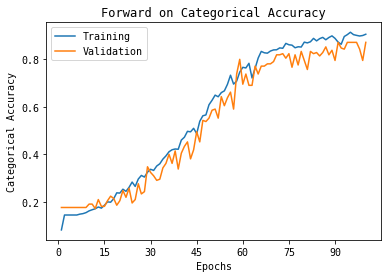

In [36]:
plot_metric(forward_history.history, title="Forward", metric="categorical_accuracy")

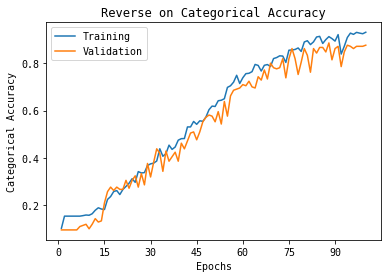

In [37]:
plot_metric(reverse_history.history, title="Reverse", metric="categorical_accuracy")

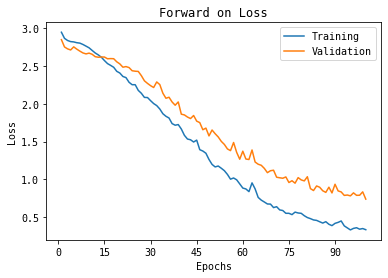

In [38]:
plot_metric(forward_history.history, title="Forward", metric="loss")

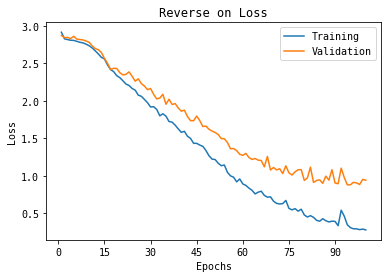

In [39]:
plot_metric(reverse_history.history, title="Reverse", metric="loss")

In [40]:
# Now use both models to predict a de novo sequence based on target sequence
missing_indices = set([0, 1, 2, 24, 25, 26, 62, 63, 64, 66, 67, 68, 69, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 209, 210, 211, 212, 213])
de_novo_sequence = "".join(c if i not in missing_indices else "-" for i, c in enumerate(target_sequence))

pred_sequence_full = predict_gaps(de_novo_sequence, forward_model, reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, pred_sequence_full)
correct_indices = missing_indices.difference(incorrect_indices)

# Print the three different sequences for visual inspection
print_sequence(target_sequence, "TARGET SEQUENCE")

TARGET SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [41]:
print_sequence(de_novo_sequence,"DE NOVO SEQUENCE", missing_indices)

DE NOVO SEQUENCE
---MTQSPSS	LSASVGDRVT	ITCK---NID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RF---G----	FTFTI-----
------YCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [42]:
print_sequence(pred_sequence_full, "PREDICTED SEQUENCE", incorrect_indices, correct_indices)

PREDICTED SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [43]:
# Compute final accuracy on de novo sequence
target_len = len(target_sequence)
full_accuracy = (target_len - len(incorrect_indices)) / target_len
print(f"Accuracy on De Novo Sequence: {full_accuracy:.3f}")

Accuracy on De Novo Sequence: 1.000


In [44]:
# Print the predictions in forward and reverse directions as well
forward_pred = predict_gaps(de_novo_sequence, forward_model=forward_model, reverse_model=None)
incorrect_indices = get_nonmatching_indices(target_sequence, forward_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(forward_pred, "FORWARD PREDICTIONS", incorrect_indices, correct_indices)

reverse_pred = predict_gaps(de_novo_sequence, forward_model=None, reverse_model=reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, reverse_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(reverse_pred, "REVERSE PREDICTIONS", incorrect_indices, correct_indices)

FORWARD PREDICTIONS
---MTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGFT	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC
REVERSE PREDICTIONS
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [45]:
# ==============================================================================
# CNN-LSTM MODEL
# ==============================================================================
model_type="cnn_lstm"

In [46]:
forward_model, forward_history, model_name = build_model(training_sequences, model_type)

Epoch 1/100
30/30 - 3s - loss: 2.9078 - categorical_accuracy: 0.1466 - val_loss: 2.8747 - val_categorical_accuracy: 0.1143 - 3s/epoch - 112ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8300 - categorical_accuracy: 0.1514 - val_loss: 2.8609 - val_categorical_accuracy: 0.1143 - 800ms/epoch - 27ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8122 - categorical_accuracy: 0.1514 - val_loss: 2.8400 - val_categorical_accuracy: 0.1143 - 827ms/epoch - 28ms/step
Epoch 4/100
30/30 - 1s - loss: 2.7907 - categorical_accuracy: 0.1514 - val_loss: 2.8181 - val_categorical_accuracy: 0.1143 - 780ms/epoch - 26ms/step
Epoch 5/100
30/30 - 1s - loss: 2.7637 - categorical_accuracy: 0.1540 - val_loss: 2.8084 - val_categorical_accuracy: 0.1286 - 814ms/epoch - 27ms/step
Epoch 6/100
30/30 - 1s - loss: 2.7134 - categorical_accuracy: 0.1725 - val_loss: 2.7715 - val_categorical_accuracy: 0.1429 - 777ms/epoch - 26ms/step
Epoch 7/100
30/30 - 1s - loss: 2.6725 - categorical_accuracy: 0.1688 - val_loss: 2.7245 - val_categorical_ac

In [47]:
reverse_model, reverse_history, _ = build_model(training_sequences_reversed, model_type)

Epoch 1/100
30/30 - 4s - loss: 2.9153 - categorical_accuracy: 0.1440 - val_loss: 2.8435 - val_categorical_accuracy: 0.1571 - 4s/epoch - 124ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8379 - categorical_accuracy: 0.1466 - val_loss: 2.7899 - val_categorical_accuracy: 0.1571 - 791ms/epoch - 26ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8118 - categorical_accuracy: 0.1466 - val_loss: 2.7739 - val_categorical_accuracy: 0.1571 - 793ms/epoch - 26ms/step
Epoch 4/100
30/30 - 1s - loss: 2.7896 - categorical_accuracy: 0.1487 - val_loss: 2.7691 - val_categorical_accuracy: 0.1571 - 763ms/epoch - 25ms/step
Epoch 5/100
30/30 - 1s - loss: 2.7369 - categorical_accuracy: 0.1667 - val_loss: 2.7495 - val_categorical_accuracy: 0.1667 - 767ms/epoch - 26ms/step
Epoch 6/100
30/30 - 1s - loss: 2.6878 - categorical_accuracy: 0.1851 - val_loss: 2.6927 - val_categorical_accuracy: 0.1714 - 759ms/epoch - 25ms/step
Epoch 7/100
30/30 - 1s - loss: 2.6406 - categorical_accuracy: 0.1936 - val_loss: 2.6397 - val_categorical_ac

In [48]:
# Forward model is trained on forward data, tested on forward data
testing_pairs = generate_input_output_pairs([target_sequence])
testX, testY = preprocess_data(testing_pairs)
_, forward_accuracy = forward_model.evaluate(testX, testY)
print(f"Accuracy on Forward Model for {model_name}: {forward_accuracy:.2f}")

7/7 [==============================] - 0s 8ms/step - loss: 0.0297 - categorical_accuracy: 0.9904
Accuracy on Forward Model for CNN LSTM: 0.99


In [49]:
# Reverse model is trained on reverse data, tested on reverse data
testing_pairs = generate_input_output_pairs([target_sequence_reversed])
testX, testY = preprocess_data(testing_pairs)
_, reverse_accuracy = reverse_model.evaluate(testX, testY)
print(f"Accuracy on Reverse Model for {model_name}: {reverse_accuracy:.2f}")

7/7 [==============================] - 0s 8ms/step - loss: 0.0347 - categorical_accuracy: 0.9904
Accuracy on Reverse Model for CNN LSTM: 0.99


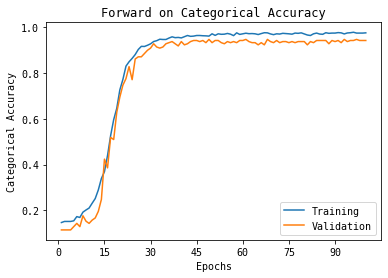

In [50]:
plot_metric(forward_history.history, title="Forward", metric="categorical_accuracy")

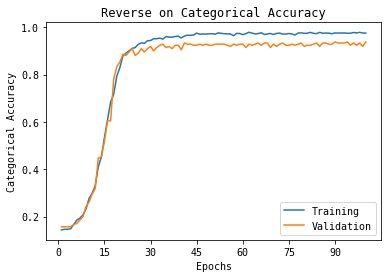

In [51]:
plot_metric(reverse_history.history, title="Reverse", metric="categorical_accuracy")

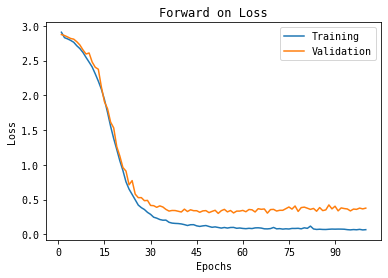

In [52]:
plot_metric(forward_history.history, title="Forward", metric="loss")

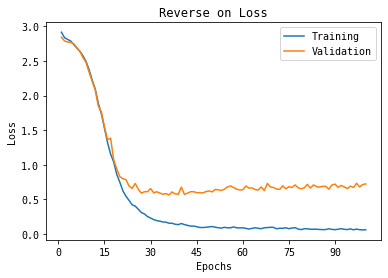

In [53]:
plot_metric(reverse_history.history, title="Reverse", metric="loss")

In [54]:
# Now use both models to predict a de novo sequence based on target sequence
missing_indices = set([0, 1, 2, 24, 25, 26, 62, 63, 64, 66, 67, 68, 69, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 209, 210, 211, 212, 213])
de_novo_sequence = "".join(c if i not in missing_indices else "-" for i, c in enumerate(target_sequence))

pred_sequence_full = predict_gaps(de_novo_sequence, forward_model, reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, pred_sequence_full)
correct_indices = missing_indices.difference(incorrect_indices)

# Print the three different sequences for visual inspection
print_sequence(target_sequence, "TARGET SEQUENCE")

TARGET SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [55]:
print_sequence(de_novo_sequence,"DE NOVO SEQUENCE", missing_indices)

DE NOVO SEQUENCE
---MTQSPSS	LSASVGDRVT	ITCK---NID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RF---G----	FTFTI-----
------YCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [56]:
print_sequence(pred_sequence_full, "PREDICTED SEQUENCE", incorrect_indices, correct_indices)

PREDICTED SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [57]:
# Compute final accuracy on de novo sequence
target_len = len(target_sequence)
full_accuracy = (target_len - len(incorrect_indices)) / target_len
print(f"Accuracy on De Novo Sequence: {full_accuracy:.3f}")

Accuracy on De Novo Sequence: 1.000


In [58]:
# Print the predictions in forward and reverse directions as well
forward_pred = predict_gaps(de_novo_sequence, forward_model=forward_model, reverse_model=None)
incorrect_indices = get_nonmatching_indices(target_sequence, forward_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(forward_pred, "FORWARD PREDICTIONS", incorrect_indices, correct_indices)

reverse_pred = predict_gaps(de_novo_sequence, forward_model=None, reverse_model=reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, reverse_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(reverse_pred, "REVERSE PREDICTIONS", incorrect_indices, correct_indices)

FORWARD PREDICTIONS
---MTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC
REVERSE PREDICTIONS
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [59]:
# ==============================================================================
# BiLSTM MODEL
# ==============================================================================
model_type="bilstm"

In [60]:
forward_model, forward_history, model_name = build_model(training_sequences, model_type)

Epoch 1/100
30/30 - 7s - loss: 2.9251 - categorical_accuracy: 0.1345 - val_loss: 2.8363 - val_categorical_accuracy: 0.1714 - 7s/epoch - 219ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8513 - categorical_accuracy: 0.1450 - val_loss: 2.7817 - val_categorical_accuracy: 0.1714 - 1s/epoch - 47ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8229 - categorical_accuracy: 0.1450 - val_loss: 2.7677 - val_categorical_accuracy: 0.1714 - 1s/epoch - 47ms/step
Epoch 4/100
30/30 - 1s - loss: 2.8172 - categorical_accuracy: 0.1450 - val_loss: 2.7635 - val_categorical_accuracy: 0.1714 - 1s/epoch - 48ms/step
Epoch 5/100
30/30 - 1s - loss: 2.8105 - categorical_accuracy: 0.1450 - val_loss: 2.7361 - val_categorical_accuracy: 0.1714 - 1s/epoch - 46ms/step
Epoch 6/100
30/30 - 1s - loss: 2.7939 - categorical_accuracy: 0.1450 - val_loss: 2.7297 - val_categorical_accuracy: 0.1905 - 1s/epoch - 46ms/step
Epoch 7/100
30/30 - 1s - loss: 2.7783 - categorical_accuracy: 0.1472 - val_loss: 2.7242 - val_categorical_accuracy: 0.1714 

In [61]:
reverse_model, reverse_history, _ = build_model(training_sequences_reversed, model_type)

Epoch 1/100
30/30 - 6s - loss: 2.9411 - categorical_accuracy: 0.1292 - val_loss: 2.8560 - val_categorical_accuracy: 0.1667 - 6s/epoch - 200ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8517 - categorical_accuracy: 0.1456 - val_loss: 2.8002 - val_categorical_accuracy: 0.1667 - 1s/epoch - 47ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8257 - categorical_accuracy: 0.1456 - val_loss: 2.7920 - val_categorical_accuracy: 0.1667 - 1s/epoch - 46ms/step
Epoch 4/100
30/30 - 1s - loss: 2.8171 - categorical_accuracy: 0.1472 - val_loss: 2.7882 - val_categorical_accuracy: 0.1667 - 1s/epoch - 45ms/step
Epoch 5/100
30/30 - 1s - loss: 2.8143 - categorical_accuracy: 0.1456 - val_loss: 2.7831 - val_categorical_accuracy: 0.1667 - 1s/epoch - 47ms/step
Epoch 6/100
30/30 - 1s - loss: 2.8052 - categorical_accuracy: 0.1456 - val_loss: 2.7727 - val_categorical_accuracy: 0.1762 - 1s/epoch - 45ms/step
Epoch 7/100
30/30 - 1s - loss: 2.7953 - categorical_accuracy: 0.1445 - val_loss: 2.7379 - val_categorical_accuracy: 0.1667 

In [62]:
# Forward model is trained on forward data, tested on forward data
testing_pairs = generate_input_output_pairs([target_sequence])
testX, testY = preprocess_data(testing_pairs)
_, forward_accuracy = forward_model.evaluate(testX, testY)
print(f"Accuracy on Forward Model for {model_name}: {forward_accuracy:.2f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.0327 - categorical_accuracy: 0.9856
Accuracy on Forward Model for Bi-LSTM: 0.99


In [63]:
# Reverse model is trained on reverse data, tested on reverse data
testing_pairs = generate_input_output_pairs([target_sequence_reversed])
testX, testY = preprocess_data(testing_pairs)
_, reverse_accuracy = reverse_model.evaluate(testX, testY)
print(f"Accuracy on Reverse Model for {model_name}: {reverse_accuracy:.2f}")

7/7 [==============================] - 0s 13ms/step - loss: 0.0356 - categorical_accuracy: 0.9904
Accuracy on Reverse Model for Bi-LSTM: 0.99


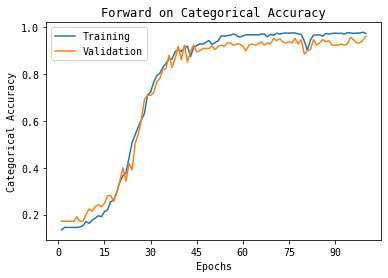

In [64]:
plot_metric(forward_history.history, title="Forward", metric="categorical_accuracy")

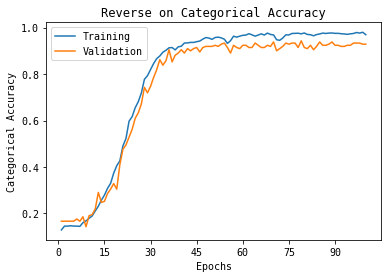

In [65]:
plot_metric(reverse_history.history, title="Reverse", metric="categorical_accuracy")

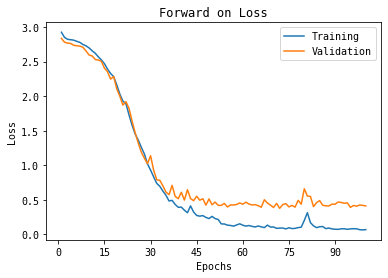

In [66]:
plot_metric(forward_history.history, title="Forward", metric="loss")

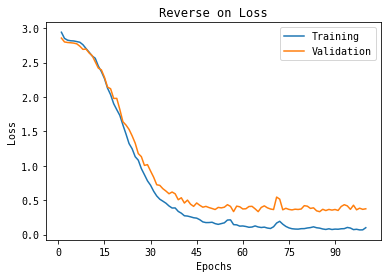

In [67]:
plot_metric(reverse_history.history, title="Reverse", metric="loss")

In [68]:
# Now use both models to predict a de novo sequence based on target sequence
missing_indices = set([0, 1, 2, 24, 25, 26, 62, 63, 64, 66, 67, 68, 69, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 209, 210, 211, 212, 213])
de_novo_sequence = "".join(c if i not in missing_indices else "-" for i, c in enumerate(target_sequence))

pred_sequence_full = predict_gaps(de_novo_sequence, forward_model, reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, pred_sequence_full)
correct_indices = missing_indices.difference(incorrect_indices)

# Print the three different sequences for visual inspection
print_sequence(target_sequence, "TARGET SEQUENCE")

TARGET SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [69]:
print_sequence(de_novo_sequence,"DE NOVO SEQUENCE", missing_indices)

DE NOVO SEQUENCE
---MTQSPSS	LSASVGDRVT	ITCK---NID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RF---G----	FTFTI-----
------YCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [70]:
print_sequence(pred_sequence_full, "PREDICTED SEQUENCE", incorrect_indices, correct_indices)

PREDICTED SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [71]:
# Compute final accuracy on de novo sequence
target_len = len(target_sequence)
full_accuracy = (target_len - len(incorrect_indices)) / target_len
print(f"Accuracy on De Novo Sequence: {full_accuracy:.3f}")

Accuracy on De Novo Sequence: 1.000


In [72]:
# Print the predictions in forward and reverse directions as well
forward_pred = predict_gaps(de_novo_sequence, forward_model=forward_model, reverse_model=None)
incorrect_indices = get_nonmatching_indices(target_sequence, forward_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(forward_pred, "FORWARD PREDICTIONS", incorrect_indices, correct_indices)

reverse_pred = predict_gaps(de_novo_sequence, forward_model=None, reverse_model=reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, reverse_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(reverse_pred, "REVERSE PREDICTIONS", incorrect_indices, correct_indices)

FORWARD PREDICTIONS
---MTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC
REVERSE PREDICTIONS
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [73]:
# ==============================================================================
# CNN-BiLSTM MODEL
# ==============================================================================
model_type="cnn_bilstm"

In [74]:
forward_model, forward_history, model_name = build_model(training_sequences, model_type)

Epoch 1/100
30/30 - 6s - loss: 2.9279 - categorical_accuracy: 0.1266 - val_loss: 2.8397 - val_categorical_accuracy: 0.1667 - 6s/epoch - 195ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8413 - categorical_accuracy: 0.1456 - val_loss: 2.7993 - val_categorical_accuracy: 0.1667 - 1s/epoch - 43ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8090 - categorical_accuracy: 0.1503 - val_loss: 2.7709 - val_categorical_accuracy: 0.1667 - 1s/epoch - 42ms/step
Epoch 4/100
30/30 - 1s - loss: 2.7705 - categorical_accuracy: 0.1577 - val_loss: 2.7390 - val_categorical_accuracy: 0.1667 - 1s/epoch - 42ms/step
Epoch 5/100
30/30 - 1s - loss: 2.7142 - categorical_accuracy: 0.1746 - val_loss: 2.6755 - val_categorical_accuracy: 0.1714 - 1s/epoch - 42ms/step
Epoch 6/100
30/30 - 1s - loss: 2.6649 - categorical_accuracy: 0.1767 - val_loss: 2.6596 - val_categorical_accuracy: 0.1905 - 1s/epoch - 42ms/step
Epoch 7/100
30/30 - 1s - loss: 2.6064 - categorical_accuracy: 0.1788 - val_loss: 2.5751 - val_categorical_accuracy: 0.2000 

In [75]:
reverse_model, reverse_history, _ = build_model(training_sequences_reversed, model_type)

Epoch 1/100
30/30 - 6s - loss: 2.9021 - categorical_accuracy: 0.1203 - val_loss: 2.8206 - val_categorical_accuracy: 0.2048 - 6s/epoch - 217ms/step
Epoch 2/100
30/30 - 1s - loss: 2.8384 - categorical_accuracy: 0.1382 - val_loss: 2.8148 - val_categorical_accuracy: 0.2048 - 1s/epoch - 43ms/step
Epoch 3/100
30/30 - 1s - loss: 2.8169 - categorical_accuracy: 0.1414 - val_loss: 2.7438 - val_categorical_accuracy: 0.2048 - 1s/epoch - 43ms/step
Epoch 4/100
30/30 - 1s - loss: 2.7770 - categorical_accuracy: 0.1577 - val_loss: 2.6785 - val_categorical_accuracy: 0.2190 - 1s/epoch - 44ms/step
Epoch 5/100
30/30 - 1s - loss: 2.7261 - categorical_accuracy: 0.1630 - val_loss: 2.6739 - val_categorical_accuracy: 0.2286 - 1s/epoch - 42ms/step
Epoch 6/100
30/30 - 1s - loss: 2.6477 - categorical_accuracy: 0.1777 - val_loss: 2.6235 - val_categorical_accuracy: 0.2286 - 1s/epoch - 43ms/step
Epoch 7/100
30/30 - 1s - loss: 2.5838 - categorical_accuracy: 0.2062 - val_loss: 2.5762 - val_categorical_accuracy: 0.2429 

In [76]:
# Forward model is trained on forward data, tested on forward data
testing_pairs = generate_input_output_pairs([target_sequence])
testX, testY = preprocess_data(testing_pairs)
_, forward_accuracy = forward_model.evaluate(testX, testY)
print(f"Accuracy on Forward Model for {model_name}: {forward_accuracy:.2f}")

7/7 [==============================] - 0s 9ms/step - loss: 0.0336 - categorical_accuracy: 0.9856
Accuracy on Forward Model for CNN Bi-LSTM: 0.99


In [77]:
# Reverse model is trained on reverse data, tested on reverse data
testing_pairs = generate_input_output_pairs([target_sequence_reversed])
testX, testY = preprocess_data(testing_pairs)
_, reverse_accuracy = reverse_model.evaluate(testX, testY)
print(f"Accuracy on Reverse Model for {model_name}: {reverse_accuracy:.2f}")

7/7 [==============================] - 0s 10ms/step - loss: 0.0298 - categorical_accuracy: 0.9856
Accuracy on Reverse Model for CNN Bi-LSTM: 0.99


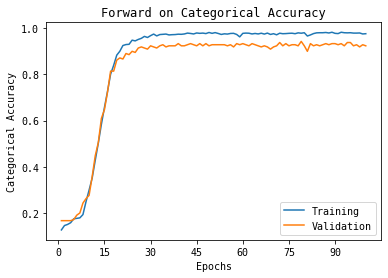

In [78]:
plot_metric(forward_history.history, title="Forward", metric="categorical_accuracy")

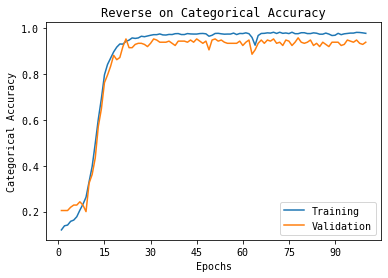

In [79]:
plot_metric(reverse_history.history, title="Reverse", metric="categorical_accuracy")

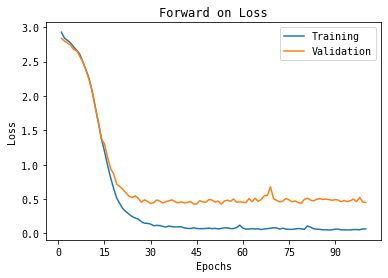

In [80]:
plot_metric(forward_history.history, title="Forward", metric="loss")

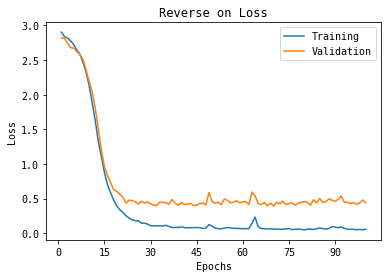

In [81]:
plot_metric(reverse_history.history, title="Reverse", metric="loss")

In [82]:
# Now use both models to predict a de novo sequence based on target sequence
missing_indices = set([0, 1, 2, 24, 25, 26, 62, 63, 64, 66, 67, 68, 69, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 209, 210, 211, 212, 213])
de_novo_sequence = "".join(c if i not in missing_indices else "-" for i, c in enumerate(target_sequence))

pred_sequence_full = predict_gaps(de_novo_sequence, forward_model, reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, pred_sequence_full)
correct_indices = missing_indices.difference(incorrect_indices)

# Print the three different sequences for visual inspection
print_sequence(target_sequence, "TARGET SEQUENCE")

TARGET SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [83]:
print_sequence(de_novo_sequence,"DE NOVO SEQUENCE", missing_indices)

DE NOVO SEQUENCE
---MTQSPSS	LSASVGDRVT	ITCK---NID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RF---G----	FTFTI-----
------YCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----


In [84]:
print_sequence(pred_sequence_full, "PREDICTED SEQUENCE", incorrect_indices, correct_indices)

PREDICTED SEQUENCE
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC


In [85]:
# Compute final accuracy on de novo sequence
target_len = len(target_sequence)
full_accuracy = (target_len - len(incorrect_indices)) / target_len
print(f"Accuracy on De Novo Sequence: {full_accuracy:.3f}")

Accuracy on De Novo Sequence: 1.000


In [86]:
# Print the predictions in forward and reverse directions as well
forward_pred = predict_gaps(de_novo_sequence, forward_model=forward_model, reverse_model=None)
incorrect_indices = get_nonmatching_indices(target_sequence, forward_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(forward_pred, "FORWARD PREDICTIONS", incorrect_indices, correct_indices)

reverse_pred = predict_gaps(de_novo_sequence, forward_model=None, reverse_model=reverse_model)
incorrect_indices = get_nonmatching_indices(target_sequence, reverse_pred)
correct_indices = missing_indices.difference(incorrect_indices)
print_sequence(reverse_pred, "REVERSE PREDICTIONS", incorrect_indices, correct_indices)

FORWARD PREDICTIONS
---MTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSFN	RGEC
REVERSE PREDICTIONS
DIQMTQSPSS	LSASVGDRVT	ITCKASQNID	KYLNWYQQKP
GKAPKLLIYN	TNNLQTGVPS	RFSGSGSGTD	FTFTISSLQP
EDIATYYCLQ	HISRPRTFGQ	GTKVEIKRTV	AAPSVFIFPP
SDEQLKSGTA	SVVCLLNNFY	PREAKVQWKV	DNALQSGNSQ
ESVTEQDSKD	STYSLSSTLT	LSKADYEKHK	VYACEVTHQG
LSSPVTKSF-	----
